# Intuition
Bayesian vs frequentist inference


![figure](./cartoons/8.svg)

# Notations


## Bayes Factor (BF)
The **Bayes Factor (BF)** (sometimes denoted as $K$) is defined as the ratio of the marginal likelihoods of two models, taking into account the prior distributions over the models' parameters. It is calculated as:

$$
BF(M_2, M_1) := \frac{Pr(D|M_2)}{Pr(D|M_1)} = \frac{\int Pr(D|\theta_2, M_2) Pr(\theta_2|M_2) d\theta_2}{\int Pr(D|\theta_1, M_1) Pr(\theta_1|M_1) d\theta_1} = \frac{\frac{Pr(M_2|D)Pr(D)}{Pr(M_2)} }{\frac{Pr(M_1|D)Pr(D)}{Pr(M_1)}} = \frac{Pr(M_2|D)}{Pr(M_1|D)} \times \frac{Pr(M_1)}{Pr(M_2)}
$$

The Bayes Factor compares the marginal likelihoods of the models after considering the uncertainty in the parameters, **weighted by the prior beliefs of the model**.

**Comparison between LR and BF**

When informative priors are **absent** or when **non-informative priors** (i.e., flat priors) are used, the prior distributions do not influence the marginal likelihoods. In such a case, the integration over the parameters becomes irrelevant, and the marginal likelihood simplifies to just the likelihood itself.

Therefore, the formula for BF becomes identical to the formula for LR ($Pr(M_1) = Pr(M_2)$):

$$
BF(M_2, M_1) = \frac{p(D|M_2)}{p(D|M_1)} = \frac{Pr(M_2|D)}{Pr(M_1|D)} \times \frac{Pr(M_1)}{Pr(M_2)}= \frac{L(M_2)}{L(M_1)} = LR(M_2, M_1)
$$

For fully specified models (In statistical modeling, a fully specified model refers to a model where all parameters and components are clearly defined), the **likelihood ratio** is equivalent to the **Bayes Factor**. When **non-informative priors** are used, LR and BF are numerically identical because the priors cancel out. However, when **informative priors** are included, BF will differ from LR because it incorporates prior beliefs about the parameters, whereas LR only considers the likelihood based on the data.


- **Likelihood Ratio (LR)** compares two models using the **likelihood function** of the models, ignoring prior distributions. It is a **frequentist** concept.
- **Bayes Factor (BF)**, on the other hand, compares two models by integrating over the parameters of the models, taking into account their **prior distributions**. It is a **Bayesian** concept.


## Advantages of Bayesian Analysis Over Frequentist Methods  

-  **Incorporation of Prior Knowledge**
    - **Frequentist Limitation:** Frequentist methods rely solely on observed data and do not incorporate prior information, making estimates unstable in small sample sizes.  
    - **Bayesian Advantage:** Bayesian analysis integrates prior knowledge through a prior distribution, improving inference when data are limited or prior information is available.  
- **Probabilistic Interpretation**
    - **Frequentist Limitation:** Confidence intervals do not provide a direct probability interpretation; they describe long-run frequency properties rather than certainty about parameters. 
    - **Bayesian Advantage:** Bayesian credible intervals directly represent the probability that a parameter lies within a given range, making interpretation more intuitive.  
- **Flexibility in Complex Models**
    - **Frequentist Limitation:** Frequentist methods often require separate estimation steps or computational approximations for hierarchical models, missing data, and latent variables.  
    - **Bayesian Advantage:** Bayesian methods seamlessly integrate over uncertainties, allowing for more flexible modeling of hierarchical structures and missing data.  
- **Direct Model Comparison**
    - **Frequentist Limitation:** Frequentist model comparison relies on likelihood ratio tests (LRT) or information criteria (AIC, BIC), which do not naturally integrate over parameter uncertainty.  
    - **Bayesian Advantage:** Bayesian model comparison uses Bayes factors, which account for both model fit and complexity by integrating over parameter uncertainty, avoiding overfitting.  


# Example

In example 6.1 and 6.2, we compare two model $M_1$ ($\theta=0$) and $M_2$ ($\theta=2$) and calculate the LRT. 

In [1]:
rm(list=ls())
set.seed(2)

# Simulate true mean and effect size
baseline <- 170  # Population mean of the trait (e.g., height in cm) when the genetic variant has no effect (Model 1)
theta_true <- 2  # True effect size of the genetic variant. This represents the change in height (in cm) associated with each additional minor allele (Model 2)
sd_y <- 1  # Standard deviation of the trait (e.g., variability in height measurement within the population)

# Simulate genotypes for three individuals
genotype <- c(1, 2, 0)

# Simulate height values for three individuals based on genotypes
n = length(genotype)
height_values <- rnorm(n, mean = baseline + theta_true * genotype, sd = sd_y)

# Display the simulated data
data.frame(genotype = genotype, height = height_values)

genotype,height
<dbl>,<dbl>
1,171.1031
2,174.1848
0,171.5878


In [2]:
# Define the likelihood function for a normal distribution
likelihood <- function(theta, sd, y) {
  prod(dnorm(y, mean = theta, sd = sd))
}

# Likelihood for Model 1: No genetic effect
likelihood_1_multi_samples <- likelihood(theta = baseline, sd = sd_y, height_values)

# Likelihood for Model 2: Genetic effect
likelihood_2_multi_samples <- likelihood(theta = baseline + theta_true * genotype, sd = sd_y, height_values)

# Print the likelihoods for both models
cat("Likelihood for Model 1:", likelihood_1_multi_samples, "\n")
cat("Likelihood for Model 2:", likelihood_2_multi_samples, "\n")
# Compute the Likelihood Ratio Test (LRT) statistic
lrt_statistic <- -2 * (log(likelihood_1_multi_samples) - log(likelihood_2_multi_samples))

# Print the LRT statistic
cat("Likelihood Ratio Test Statistic (LRT):", lrt_statistic, "\n")

Likelihood for Model 1: 1.542167e-06 
Likelihood for Model 2: 0.01183428 
Likelihood Ratio Test Statistic (LRT): 17.89114 


## Frequentist

### From LRT to reject the hypothesis (*p-value*)

Generally what a frequentist do next is to **perform the likelihood ratio statistics**. The likelihood ratio statistic can be compared to the **chi-square distribution with 1 degree of freedom**. If the test statistic is large enough (i.e., exceeds the critical value from the chi-square distribution at a chosen significance level, say 0.05), then we reject $H_1$ in favor of $H_2$, indicating that the genetic variant has a significant effect on height.

> Then one would like to address the question: **what value of the LR should we treat as “convincing” evidence for one model vs another?** For example, in statistics there are many situations where we want to compare models that are not equally plausible. Suppose that model $M_2$ is much less plausible than $M_1$. Then we must surely demand stronger evidence from the data (larger LR) to be “convinced” that it arose from model $M_2$ rather than $M_1$, than in contexts where $M_2$ and $M_1$ are equally plausible.
>
> It is crucial to recognize that the answer to this question has to be context dependent. In particular, the extent to which we should be “convinced” by a particular LR value has to depend on the relative plausibility of the models we are comparing.

In [3]:
# Compare with chi-square distribution with 1 degree of freedom
p_value <- pchisq(lrt_statistic, df = 1, lower.tail = FALSE)

# Print result
cat("LRT statistic:", lrt_statistic, "\n")
cat("p-value:", p_value, "\n")

# Interpretation
if (p_value < 0.05) {
  cat("Reject H0: The genetic variant has a significant effect on height.\n")
} else {
  cat("Fail to reject H0: The genetic variant has no significant effect on height.\n")
}

LRT statistic: 17.89114 
p-value: 2.339081e-05 
Reject H0: The genetic variant has a significant effect on height.


### MLE

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the **maximum likelihood estimate**.

Now let's assume that $\theta$ actually follows some distribution and for each value of $\theta$ we can calculate the corresponding likelihood $L(\theta)$. Then what is the value when $L(\theta)$ reaches the maximum? The value of $\theta$ that maximizes the likelihood function is referred to as the **maximum likelihood estimate**, and usually denoted $\hat{\theta}$, i.e., 

$$
\hat{\theta}:= \text{argmax} L(\theta)
$$

Since 
$$
LRT(M_2, M_1) := - 2 \log \left( \frac{L(M_1)}{L(M_2)} \right) = - 2 \left[ \log L(M_1) - \log L(M_2) \right]
$$

it is equivalent to finding the minimum value of the LRT.

In [4]:
# Define the negative log-likelihood function for optimization
neg_log_likelihood <- function(theta, genotype, height, baseline, sd) {
      n <- length(genotype)
      log_likelihood_val <- sum(dnorm(height, mean = baseline + theta * genotype, sd = sd, log = TRUE))
  return(-2*log_likelihood_val)
}

# Estimate theta using MLE (optimizing the negative log-likelihood)
mle_result <- optimize(neg_log_likelihood, interval = c(-5, 5), genotype = genotype, height = height_values, baseline = baseline, sd = sd_y)

# Extract the estimated theta
theta_mle <- mle_result$minimum

print(paste0("The MLE of theta is ", theta_mle))

[1] "The MLE of theta is 1.8945567645337"


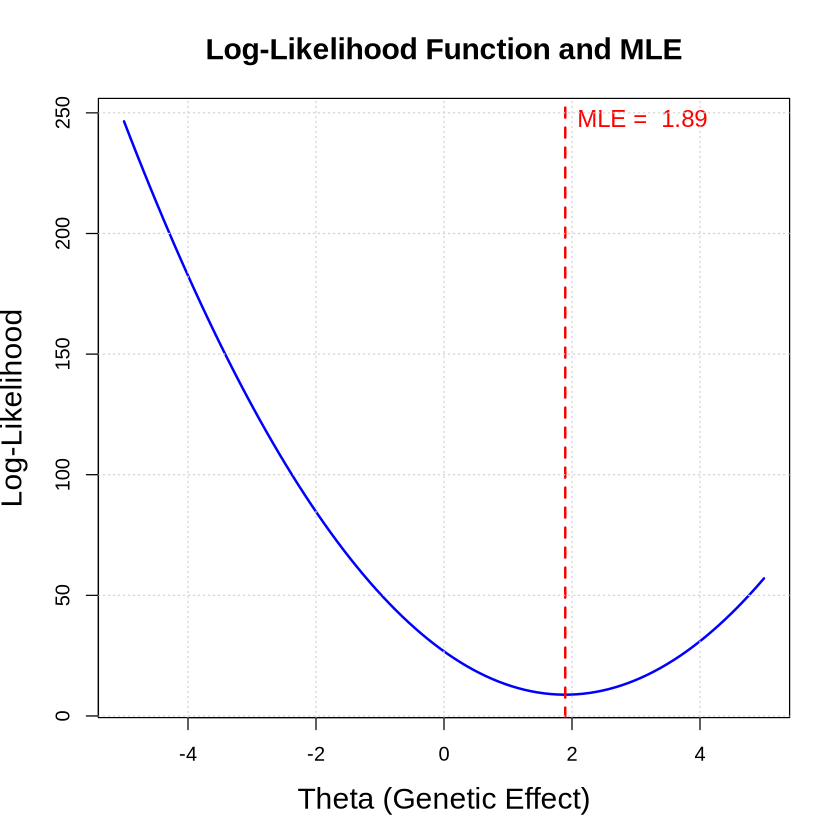

In [5]:
# Plot the log-likelihood function
theta_vals <- seq(-5, 5, length.out = 100)
log_likelihood_vals <- sapply(theta_vals, function(theta) neg_log_likelihood(theta, genotype, height_values, baseline, sd_y))

# Plot the log-likelihood function
plot(theta_vals, log_likelihood_vals, type = "l", col = "blue", lwd = 2, 
     xlab = "Theta (Genetic Effect)", ylab = "Log-Likelihood", 
     main = "Log-Likelihood Function and MLE", cex.lab = 1.5, cex.main = 1.5)

# Add a vertical line at the MLE
abline(v = theta_mle, col = "red", lty = 2, lwd = 2)

# Add text to label the MLE
text(theta_mle, max(log_likelihood_vals), labels = paste("MLE = ", round(theta_mle, 2)), pos = 4, col = "red", cex = 1.2)

# Show the plot
grid()

## Bayesian

Now let's see how a Bayesian statistician would handle this question.

In [6]:
cat("Likelihood for Model 1:", likelihood_1_multi_samples, "\n")
cat("Likelihood for Model 2:", likelihood_2_multi_samples, "\n")

Likelihood for Model 1: 1.542167e-06 
Likelihood for Model 2: 0.01183428 


### When we have the prior of the model and it is informative ...

If we don't know anything about the probability of $M_1$ and $M_2$, then it is generally assumed that they are equally possible:

In [7]:
# Compute the Bayes Factor
bayes_factor <- likelihood_2_multi_samples / likelihood_1_multi_samples

# Print the Bayes Factor
cat("Bayes Factor (without informative priors):", bayes_factor, "\n")


Bayes Factor (without informative priors): 7673.803 


In this case the result is the same as the LRT that we calcualte above.

However when we are aware of a fact that **this genetic variant actually comes from a gene that's been proved to be directly associated with height**, then we believe that the probability of $M_1$ is lower than the probability of $M_2$. Using Bayesian analysis allows us to incorporate this information into the inference:

In [8]:
# Define prior probabilities for Model 1 and Model 2
prior_M1 <- 0.3  # Prior probability for Model 1
prior_M2 <- 0.7  # Prior probability for Model 2

# Compute the adjusted Bayes Factor
bayes_factor <- (prior_M2 / prior_M1) * (likelihood_2_multi_samples / likelihood_1_multi_samples)

# Print the adjusted Bayes Factor
cat("Bayes Factor (with priors):", bayes_factor, "\n")

Bayes Factor (with priors): 17905.54 


### When the model is not fully specific 

Unlike a likelihood-ratio test, this Bayesian model comparison does not depend on any single set of parameters, as it integrates over all parameters in each model (with respect to the respective priors). An advantage of the use of Bayes factors is that it automatically, and quite naturally, includes a penalty for including too much model structure

For example, if we want to compare $M_1$ and $M^{'}_2$,

- **Model 1 ($M_1$)**: The genetic variant has **no effect** on height.   
- **Model 2' ($M^{'}_2$)**: The genetic variant has a **significant effect** between 1 and 3 on height. 

In frequentist analysis, we typically perform a Likelihood Ratio Test (LRT) to compare nested models. However, for this comparison between $M_1$ and $M^{'}_2$, the models are not nested. Model 2' introduces a parameter space (effect size range of 1 to 3) that is not a simple extension of Model 1. Because of this, LRT is not appropriate for comparing these two models, as it requires nested models where one model is a special case of the other (i.e., $M_1$ must be a simpler version of $M^{'}_2$). Therefore, in this case, the LRT will not work.

On the other hand, Bayesian analysis can still be applied because it doesn't require nested models. In Bayesian model comparison, we calculate the Bayes Factor (BF) to assess the relative support for the two models. Bayes factors naturally handle model comparison even for non-nested models by integrating over all parameters and incorporating the prior knowledge.


In [9]:
# Create a vectorized function for integration
likelihood_function <- function(theta_value) {
    # Calculate the expected value for each observation based on genotype
    means <- baseline + theta_value * genotype
    # Calculate likelihood for this theta
    result <- likelihood(theta = means, sd = sd_y, y=height_values)
  return(result)
}
integrated_likelihood_M2_prime <- integrate(Vectorize(likelihood_function), lower = 1, upper = 3)
integrated_likelihood_M2_prime
print(paste("Integrated likelihood for Model 2':", integrated_likelihood_M2_prime$value))

0.01323835 with absolute error < 2.1e-12

[1] "Integrated likelihood for Model 2': 0.0132383537758094"


Then the bayes factor between $M_1$ and $M^{'}_2$ is:

In [10]:
# Compute the adjusted Bayes Factor
bayes_factor <- integrated_likelihood_M2_prime$value/likelihood_1_multi_samples

# Print the adjusted Bayes Factor
cat("Bayes Factor (M1 versus M2'):", bayes_factor, "\n")

Bayes Factor (M1 versus M2'): 8584.255 
